# Data Cleansing and Feature Extraction

### Reading data

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading dataset
df = pd.read_csv(data_dir + '1.csv')

### Basic Statistics


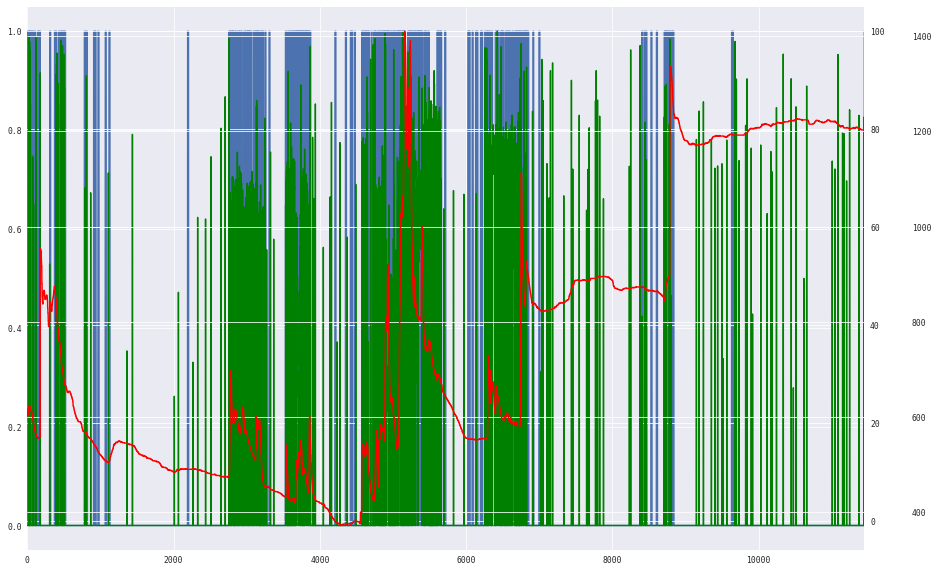

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

df.motion.plot(ax=ax, label = 'Motion')
df.distance.plot(ax=ax2, style='g-', label = 'Distance')
df.co2.plot(ax=ax3, style='r-', label = 'CO2')

plt.show()

In [21]:
df.describe()

,co2,motion,distance
count,11448.000000,11448.000000,11448.000000
mean,770.752096,0.183526,9.713074
std,288.715726,0.387114,24.923468
min,372.000000,0.000000,-1.000000
25%,521.000000,0.000000,-1.000000
50%,672.000000,0.000000,-1.000000
75%,952.500000,0.000000,-1.000000
max,1410.000000,1.000000,99.879311


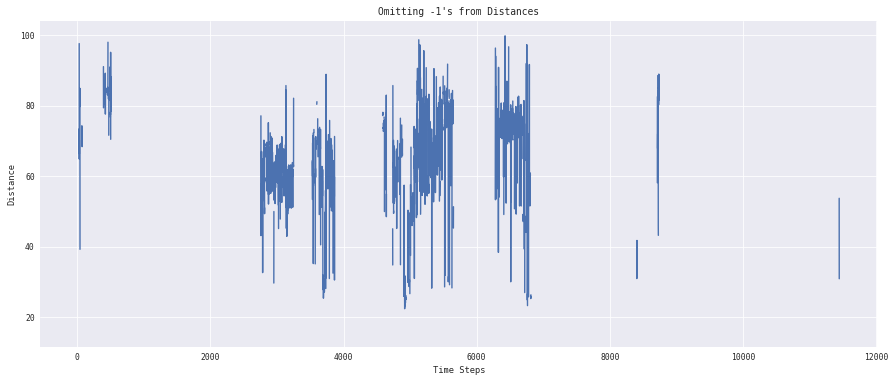

In [22]:
plt.figure(figsize=(15,6))
plt.plot(df.distance.replace(-1,np.NaN))
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.title('Omitting -1\'s from Distances')
plt.show()

### Some Ideas

The chart shows that the values of distance, frequency of motion pulses, and spikes of CO2 are correlated.

Also, we can conclude:

- **CO2 Level**:
    - Data is continous.
    - Data should be normalized.
    - The n-th step differntiate could be usefull.
- **Motion**:
    - Data is discrete binary pulses.
    - Data represents if the sensor detects any motion or not.
    - There is no need to be normalizated.
    - Pulse frequencies may be usefull.
    - The n-th step accumulative value could be helpful.
- **Distance**:
    - Data should be normalized.
    - There are many -1's in distance data.
    - It is high probable -1's are not correct (distance is an absolute value)
    - We can safely change -1's to 0 or NAN.
    - The n-th step differentiate could be useful.
    - The frequency of the data variation could be helpful.
    - We may extract a binary feature: 0 when tha value is -1 and 1 instead of positive values.
    - The n-th step accumulative value could be helpful.


## Data Cleansing
### Normalization
As we know, our dataset includs different scale measurments. Therefore, we need to normalize our dataset with commonly used methods in range 0 to 1.
For these purpose, we use common **Min-Max** method to normalize for future usage.

*We don't need the motion data to be normalized: it is already binary array.*

In [23]:
# Min-Max normalization function
def MinMaxNorm(values):
    return (values - values.min()) / (values.max() - values.min())

# distance: replacing -1 with 0
df.distance = df.distance.replace(-1, 0)

# Normalization
df['distance_n'] = MinMaxNorm(df.distance)
df['co2_n'] = MinMaxNorm(df.co2)

## Feature Extraction
### Differentiated data extraction

In [24]:
df['co2_d'] = np.gradient(df.co2_n)
df['distance_d'] = np.gradient(df.distance_n)

### Generating distance binary values 

In [25]:
df['distance_p'] = np.where(df['distance'] == 0, 0, 1)

C:\Users\amirp\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\amirp\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


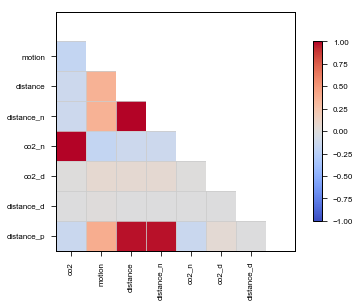

In [31]:
import seaborn as sns

kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

sns.set_style("whitegrid", kw)
ax = sns.linearmodels.corrplot(df, annot=False, diag_names=False)
plt.show()

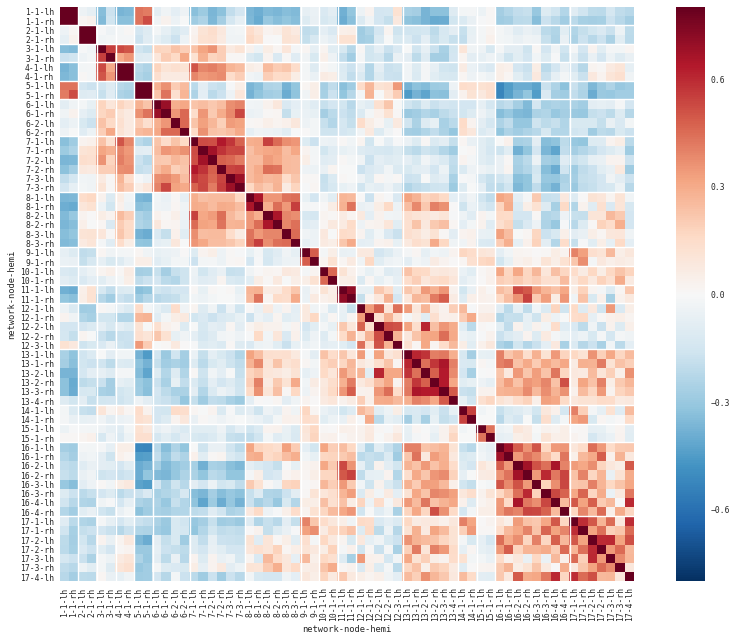

In [12]:
import seaborn as sns
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()
plt.show()
#sns.heatmap(data, square='True')
#plt.yticks(rotation = 0)
#plt.xticks(rotation = 90)
#plt.show()

In [9]:
data = df
data = data.drop('time', 1)
data = data.drop('co2', 1)
data = data.drop('distance', 1)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

KeyError: 'time'